In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pandas as pd

## Import Digits

### Load labels train & test

In [2]:
y_train = np.loadtxt("../train_labels.txt",dtype=str)
y_test = np.loadtxt("../test_labels.txt",dtype=str)

### Load data train & test

In [3]:
filenames_train = [x for x in os.listdir("../train_voyelles") if x[0]=="v"]
filenames_train.sort()
filenames_test = [x for x in os.listdir("../test_voyelles") if x[0]=="v"]
filenames_test.sort()

In [4]:
x_train = []
for f in filenames_train:
  input = np.loadtxt("../train_voyelles/"+f, dtype='i', delimiter='\t')
  x_train.append(input)
x_train = np.asarray(x_train)

In [5]:
x_test = []
for f in filenames_test:
  input = np.loadtxt("../test_voyelles/"+f, dtype='i', delimiter='\t')
  x_test.append(input)
x_test = np.asarray(x_test)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4500, 18, 18)
(4500,)
(500, 18, 18)
(500,)


In [7]:
for v in ['A','E','I','O','U']:
  print(v+": "+str(np.sum(y_test==v)))

A: 105
E: 108
I: 92
O: 108
U: 87


E


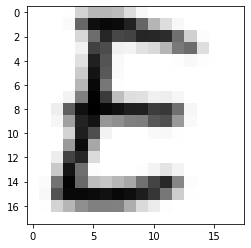

In [8]:
id = random.randint(0, len(x_test))
plt.imshow(x_test[id],cmap ="gray")
print(y_test[id])

I


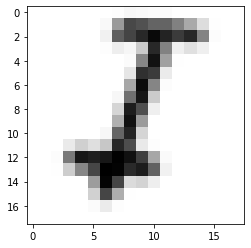

In [9]:
plt.imshow(x_test[0],cmap ="gray")
print(y_test[0])

### Reshape Train and test data for sklearn estimator

In [10]:
x_train = x_train.reshape(x_train.shape[0], -1)

In [11]:
x_test = x_test.reshape(x_test.shape[0], -1)

In [12]:
x_train.shape

(4500, 324)

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
def train_kmeans(x_train, y_train, x_test, y_test, k=5):
    
    # KMEANS ESTIMATOR
    kmeans = KMeans(n_clusters=k)
    
    # FIT ON TRAIN DATA
    kmeans.fit(x_train, y_train)
    
    # PREDICT ON TEST DATA
    preds = kmeans.predict(x_test)
    
    # EVALUATION
    score1 = silhouette_score(x_train, y_train)
    print("Silhouette Score : ", score1)
    score2 = homogeneity_score(y_test, preds)
    print("Homogeneity Score : ", score2)
    
    return kmeans, preds


In [15]:
# Warning but still working so we keep it as it is
kmeans, preds = train_kmeans(x_train, y_train, x_test, y_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2d0789eaf0>
Traceback (most recent call last):
  File "/home/humanum/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/humanum/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/humanum/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/humanum/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Silhouette Score :  0.05606698128902493
Homogeneity Score :  0.36118686953313606


In [16]:
kmeans.cluster_centers_

array([[254.59195402, 254.38362069, 254.40373563, ..., 254.98706897,
        254.99137931, 255.        ],
       [254.52862595, 254.16125954, 253.82824427, ..., 254.27958015,
        254.61450382, 254.82919847],
       [255.        , 254.99838449, 254.99434572, ..., 254.91680129,
        254.98061389, 254.99353796],
       [254.05849582, 253.29108635, 250.99442897, ..., 252.9275766 ,
        254.14902507, 254.61559889],
       [254.99      , 254.99      , 254.945     , ..., 254.735     ,
        254.8175    , 254.8875    ]])

In [17]:
kmeans.labels_

array([1, 2, 0, ..., 1, 3, 2], dtype=int32)

In [18]:
y_test = list(y_test)

In [19]:
y_preds = list(preds)

In [20]:
zipped = list(zip(y_test, y_preds))
df = pd.DataFrame(zipped, columns=['TRUE_VALUE', 'PREDICTION'])

In [30]:
df_test = df[df['TRUE_VALUE'] == 'I']
df_test.value_counts()

In [32]:
#/!\ les valeurs peuvent changer de place lorsque l on relance le notebook, il faut alors modifier l etiquette associée à chaque élément
preds_labelled = ['A' if elem == 4 else 'I' if elem == 1 else 'E' if elem == 0 else 'O' if elem == 2 else 'U' for elem in preds]

### Evaluation of predictions

In [33]:
print(metrics.classification_report(y_test, preds_labelled))

              precision    recall  f1-score   support

           A       0.89      0.81      0.85       105
           E       0.70      0.56      0.63       108
           I       0.66      0.72      0.69        92
           O       0.45      0.54      0.49       108
           U       0.34      0.34      0.34        87

    accuracy                           0.60       500
   macro avg       0.61      0.59      0.60       500
weighted avg       0.62      0.60      0.60       500



In [34]:
cm = confusion_matrix(y_test, preds_labelled, labels=['U', 'E', 'A', 'I', 'O'])

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['U', 'E', 'A', 'I', 'O'])

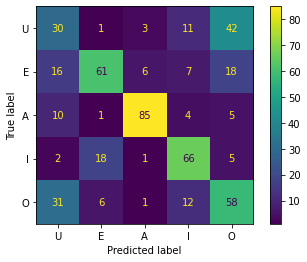

In [36]:
disp.plot()

### Get errors

#### /!\ Il faut rerun la cellule du load images x_test pour avoir les bonnes dimensions

In [40]:
def get_error(y_test, preds):
    list_indice_errors = []
    for i in range(0, len(y_test)):
        if y_test[i] != preds[i]:
            list_indice_errors.append(i)
    return list_indice_errors

In [41]:
list_indice_errors = get_error(y_test, preds_labelled)

In [43]:
list_indice_errors[:2]

[5, 8]

ERROR :
TRUE VALUE :  U
PREDICTION:  O


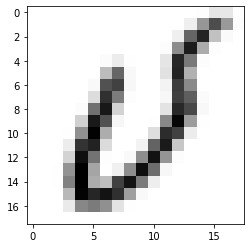

In [50]:
print("ERROR :")
plt.imshow(x_test[5],cmap ="gray")
print("TRUE VALUE : ", y_test[5])
print("PREDICTION: ", preds_labelled[5])

ERROR :
TRUE VALUE :  E
PREDICTION:  O


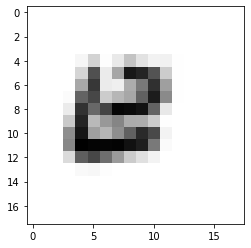

In [51]:
print("ERROR :")
plt.imshow(x_test[8],cmap ="gray")
print("TRUE VALUE : ", y_test[8])
print("PREDICTION: ", preds_labelled[8])

ERROR :
TRUE VALUE :  I
PREDICTION:  E


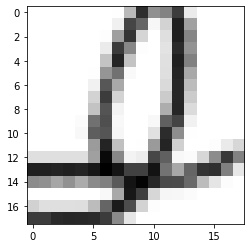

In [67]:
print("ERROR :")
plt.imshow(x_test[12],cmap ="gray")
print("TRUE VALUE : ", y_test[12])
print("PREDICTION: ", preds_labelled[12])

## KNN algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
def train_knn(x_train, y_train, x_test, y_test, k=5):
    
    # KN ESTIMATOR
    neigh = KNeighborsClassifier(n_neighbors=k)

    
    # FIT ON TRAIN DATA
    neigh.fit(x_train, y_train)
    
    # PREDICT ON TEST DATA
    preds = neigh.predict(x_test)
    
    # EVALUATION
    print(metrics.classification_report(y_test, preds))

    return neigh, preds

In [40]:
neigh, preds = train_knn(x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           A       1.00      0.98      0.99       105
           E       0.97      0.96      0.97       108
           I       0.96      0.98      0.97        92
           O       0.95      0.98      0.97       108
           U       0.98      0.95      0.97        87

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [41]:
cm = confusion_matrix(y_test, preds, labels=['U', 'E', 'A', 'I', 'O'])

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['U', 'E', 'A', 'I', 'O'])

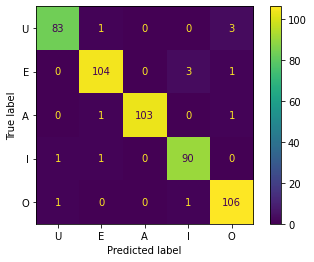

In [43]:
disp.plot()

In [46]:
df_test = df[df['TRUE_VALUE'] == 'O']
df_test.value_counts()

TRUE_VALUE  PREDICTION
O           2             58
            3             31
            1             12
            0              6
            4              1
dtype: int64

### Get errors

#### /!\ Il faut rerun la cellule du load images x_test pour avoir les bonnes dimensions

In [62]:
list_indice_errors = get_error(y_test, preds)

In [63]:
list_indice_errors

[12, 64, 124, 145, 163, 331, 338, 372, 375, 411, 413, 479, 480, 483]

NO ERROR :
TRUE VALUE :  U
PREDICTION:  U


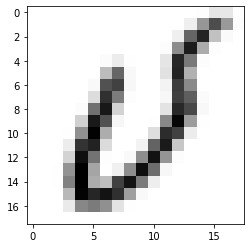

In [72]:
print("NO ERROR :")
plt.imshow(x_test[5],cmap ="gray")
print("TRUE VALUE : ", y_test[5])
print("PREDICTION: ", preds[5])

NO ERROR :
TRUE VALUE :  E
PREDICTION:  E


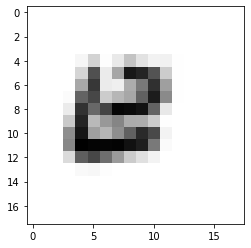

In [70]:
print("NO ERROR :")
plt.imshow(x_test[8],cmap ="gray")
print("TRUE VALUE : ", y_test[8])
print("PREDICTION: ", preds[8])

ERROR :
TRUE VALUE :  I
PREDICTION:  U


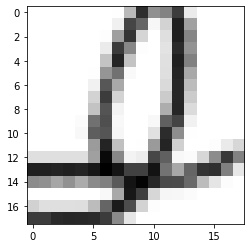

In [71]:
print("ERROR :")
plt.imshow(x_test[12],cmap ="gray")
print("TRUE VALUE : ", y_test[12])
print("PREDICTION: ", preds[12])